In [1]:
%cd ../
%matplotlib inline

/home/work/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data.db',
                                      mask='data/synthetic_data/nifti_files/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='data/synthetic_data/nifti_files/wholebrain.nii.gz', num_factors=20, embedding_dim=2)

10/01/2018 21:49:01 Loading Nifti image data/synthetic_data/nifti_files/subject_19.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2018 21:49:04 Loading Nifti image data/synthetic_data/nifti_files/subject_3.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2018 21:49:08 Loading Nifti image data/synthetic_data/nifti_files/subject_8.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2018 21:49:10 Loading Nifti image data/synthetic_data/nifti_files/subject_12.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2018 21:49:12 Loading Nifti image data/synthetic_data/nifti_files/subject_10.nii with mask data/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/01/2018 21:49:15 Loading Nifti image data/synthetic_data/nifti_files/subject_6.nii with mask data/synthetic_data/nifti_files

In [6]:
dtfa.normalize_activations()

[tensor(16.9328),
 tensor(11.9599),
 tensor(14.3852),
 tensor(12.9853),
 tensor(10.1775),
 tensor(9.5577),
 tensor(15.9531),
 tensor(7.2812),
 tensor(10.8206),
 tensor(14.4482),
 tensor(14.9423),
 tensor(11.2110),
 tensor(8.6124),
 tensor(11.3451),
 tensor(16.7118),
 tensor(11.7571),
 tensor(9.2271),
 tensor(11.4212),
 tensor(12.6523),
 tensor(12.5486)]

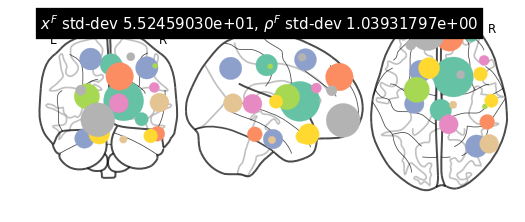

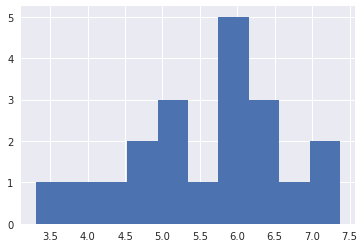

(<nilearn.plotting.displays.OrthoProjector at 0x7f8e46ef56d8>,
 tensor([[ 35.0193,  56.2090, -10.1498],
         [  2.7334, -22.5181,  47.3606],
         [ 16.0903,  12.2584,   9.2188],
         [ 51.5951, -35.0310, -25.4232],
         [ 11.9453,  53.9167,  34.8560],
         [-25.1018, -15.9050, -30.4524],
         [-18.6273,  18.2417,  53.1253],
         [ 40.5048, -60.5102,  43.9095],
         [ 11.1053, -37.5247,   6.6223],
         [ 48.3741,  29.6639,  23.2283],
         [ 49.2028, -18.8091,  45.9885],
         [-22.5302,  -1.1721,  13.8644],
         [ 56.0077, -12.7386,   8.9571],
         [ -9.5319,  21.5775, -25.3273],
         [ 44.5462,  15.3611, -27.7151],
         [ 15.7803, -17.0152, -31.4105],
         [ 53.7022, -58.0806,   7.3186],
         [ 23.6231,  14.6022,  55.5896],
         [-11.1098,  57.8834, -10.7531],
         [-28.8337,  45.9402,  20.3945]]),
 tensor([ 5.1926,  6.1486,  7.3750,  5.3956,  6.6325,  5.9443,  6.1800,
          6.2214,  5.8951,  4.6348,  3.3066

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=2000, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=150, use_cuda=True, blocks_batch_size=8, patience=50, checkpoint_steps=100)

10/01/2018 21:50:09 [Epoch 1] (4009ms) Posterior free-energy 1.61857446e+09 = KL from prior 4.35132062e+05 - log-likelihood -1.61813936e+09
10/01/2018 21:50:09 Saving checkpoint...
10/01/2018 21:50:13 [Epoch 2] (3468ms) Posterior free-energy 7.51418880e+08 = KL from prior 3.89934359e+05 - log-likelihood -7.51028992e+08
10/01/2018 21:50:16 [Epoch 3] (3507ms) Posterior free-energy 6.52212608e+08 = KL from prior 3.82545219e+05 - log-likelihood -6.51830048e+08
10/01/2018 21:50:20 [Epoch 4] (4085ms) Posterior free-energy 6.52096832e+08 = KL from prior 3.79444781e+05 - log-likelihood -6.51717376e+08
10/01/2018 21:50:24 [Epoch 5] (3499ms) Posterior free-energy 6.55631616e+08 = KL from prior 3.78746844e+05 - log-likelihood -6.55252864e+08
10/01/2018 21:50:28 [Epoch 6] (3803ms) Posterior free-energy 6.23032576e+08 = KL from prior 3.78185609e+05 - log-likelihood -6.22654368e+08
10/01/2018 21:50:31 [Epoch 7] (3508ms) Posterior free-energy 6.29147264e+08 = KL from prior 3.80113766e+05 - log-likeli

Epoch   707: reducing learning rate of group 0 to 5.0000e-02.


10/01/2018 22:33:03 [Epoch 709] (3527ms) Posterior free-energy 2.16423040e+08 = KL from prior 4.25796547e+05 - log-likelihood -2.15997248e+08
10/01/2018 22:33:07 [Epoch 710] (3542ms) Posterior free-energy 2.16425696e+08 = KL from prior 4.25510500e+05 - log-likelihood -2.16000192e+08
10/01/2018 22:33:10 [Epoch 711] (3516ms) Posterior free-energy 2.16516480e+08 = KL from prior 4.25244375e+05 - log-likelihood -2.16091216e+08
10/01/2018 22:33:14 [Epoch 712] (3517ms) Posterior free-energy 2.16327920e+08 = KL from prior 4.25356562e+05 - log-likelihood -2.15902576e+08
10/01/2018 22:33:17 [Epoch 713] (3513ms) Posterior free-energy 2.16365936e+08 = KL from prior 4.25449469e+05 - log-likelihood -2.15940488e+08
10/01/2018 22:33:21 [Epoch 714] (3520ms) Posterior free-energy 2.16327872e+08 = KL from prior 4.25821406e+05 - log-likelihood -2.15902048e+08
10/01/2018 22:33:24 [Epoch 715] (3505ms) Posterior free-energy 2.16278304e+08 = KL from prior 4.25196375e+05 - log-likelihood -2.15853104e+08
10/01/

Epoch   782: reducing learning rate of group 0 to 2.5000e-02.


10/01/2018 22:37:27 [Epoch 784] (3509ms) Posterior free-energy 2.16235232e+08 = KL from prior 4.25228531e+05 - log-likelihood -2.15810024e+08
10/01/2018 22:37:31 [Epoch 785] (3520ms) Posterior free-energy 2.16222496e+08 = KL from prior 4.24626266e+05 - log-likelihood -2.15797872e+08
10/01/2018 22:37:34 [Epoch 786] (3508ms) Posterior free-energy 2.16252624e+08 = KL from prior 4.24276781e+05 - log-likelihood -2.15828336e+08
10/01/2018 22:37:38 [Epoch 787] (3528ms) Posterior free-energy 2.16237536e+08 = KL from prior 4.24885672e+05 - log-likelihood -2.15812656e+08
10/01/2018 22:37:41 [Epoch 788] (3518ms) Posterior free-energy 2.16245760e+08 = KL from prior 4.25341422e+05 - log-likelihood -2.15820424e+08
10/01/2018 22:37:45 [Epoch 789] (3504ms) Posterior free-energy 2.16225888e+08 = KL from prior 4.24612016e+05 - log-likelihood -2.15801280e+08
10/01/2018 22:37:48 [Epoch 790] (3497ms) Posterior free-energy 2.16318400e+08 = KL from prior 4.25189156e+05 - log-likelihood -2.15893208e+08
10/01/

Epoch   880: reducing learning rate of group 0 to 1.2500e-02.


10/01/2018 22:43:12 [Epoch 882] (3516ms) Posterior free-energy 2.16226464e+08 = KL from prior 4.24231312e+05 - log-likelihood -2.15802248e+08
10/01/2018 22:43:15 [Epoch 883] (3554ms) Posterior free-energy 2.16208672e+08 = KL from prior 4.24132953e+05 - log-likelihood -2.15784536e+08
10/01/2018 22:43:19 [Epoch 884] (3582ms) Posterior free-energy 2.16305536e+08 = KL from prior 4.24911969e+05 - log-likelihood -2.15880624e+08
10/01/2018 22:43:22 [Epoch 885] (3525ms) Posterior free-energy 2.16184096e+08 = KL from prior 4.24931578e+05 - log-likelihood -2.15759168e+08
10/01/2018 22:43:26 [Epoch 886] (3867ms) Posterior free-energy 2.16276064e+08 = KL from prior 4.24844609e+05 - log-likelihood -2.15851232e+08
10/01/2018 22:43:30 [Epoch 887] (3839ms) Posterior free-energy 2.16197360e+08 = KL from prior 4.24707031e+05 - log-likelihood -2.15772648e+08
10/01/2018 22:43:34 [Epoch 888] (3617ms) Posterior free-energy 2.16303120e+08 = KL from prior 4.24127016e+05 - log-likelihood -2.15878992e+08
10/01/

Epoch   931: reducing learning rate of group 0 to 6.2500e-03.


10/01/2018 22:46:25 [Epoch 933] (3982ms) Posterior free-energy 2.16198784e+08 = KL from prior 4.24529703e+05 - log-likelihood -2.15774248e+08
10/01/2018 22:46:29 [Epoch 934] (3705ms) Posterior free-energy 2.16227760e+08 = KL from prior 4.24619672e+05 - log-likelihood -2.15803136e+08
10/01/2018 22:46:33 [Epoch 935] (3922ms) Posterior free-energy 2.16290016e+08 = KL from prior 4.24693812e+05 - log-likelihood -2.15865328e+08
10/01/2018 22:46:37 [Epoch 936] (3705ms) Posterior free-energy 2.16227648e+08 = KL from prior 4.24214828e+05 - log-likelihood -2.15803424e+08
10/01/2018 22:46:40 [Epoch 937] (3671ms) Posterior free-energy 2.16199856e+08 = KL from prior 4.24415672e+05 - log-likelihood -2.15775440e+08
10/01/2018 22:46:44 [Epoch 938] (3842ms) Posterior free-energy 2.16223424e+08 = KL from prior 4.23960359e+05 - log-likelihood -2.15799464e+08
10/01/2018 22:46:48 [Epoch 939] (4206ms) Posterior free-energy 2.16162336e+08 = KL from prior 4.24668984e+05 - log-likelihood -2.15737664e+08
10/01/

Epoch   998: reducing learning rate of group 0 to 3.1250e-03.


10/01/2018 22:50:32 [Epoch 1000] (3725ms) Posterior free-energy 2.16161136e+08 = KL from prior 4.24638484e+05 - log-likelihood -2.15736496e+08
10/01/2018 22:50:35 [Epoch 1001] (3748ms) Posterior free-energy 2.16182560e+08 = KL from prior 4.24142953e+05 - log-likelihood -2.15758416e+08
10/01/2018 22:50:35 Saving checkpoint...
10/01/2018 22:50:39 [Epoch 1002] (3780ms) Posterior free-energy 2.16168672e+08 = KL from prior 4.24294906e+05 - log-likelihood -2.15744376e+08
10/01/2018 22:50:43 [Epoch 1003] (3715ms) Posterior free-energy 2.16177232e+08 = KL from prior 4.24353000e+05 - log-likelihood -2.15752872e+08
10/01/2018 22:50:47 [Epoch 1004] (3657ms) Posterior free-energy 2.16215296e+08 = KL from prior 4.24461828e+05 - log-likelihood -2.15790832e+08
10/01/2018 22:50:51 [Epoch 1005] (4202ms) Posterior free-energy 2.16207616e+08 = KL from prior 4.23866234e+05 - log-likelihood -2.15783760e+08
10/01/2018 22:50:55 [Epoch 1006] (4281ms) Posterior free-energy 2.16226240e+08 = KL from prior 4.2451

Epoch  1049: reducing learning rate of group 0 to 1.5625e-03.


10/01/2018 22:53:44 [Epoch 1051] (3745ms) Posterior free-energy 2.16237008e+08 = KL from prior 4.23853719e+05 - log-likelihood -2.15813152e+08
10/01/2018 22:53:47 [Epoch 1052] (3775ms) Posterior free-energy 2.16183088e+08 = KL from prior 4.24600438e+05 - log-likelihood -2.15758488e+08
10/01/2018 22:53:51 [Epoch 1053] (3945ms) Posterior free-energy 2.16176992e+08 = KL from prior 4.24431234e+05 - log-likelihood -2.15752560e+08
10/01/2018 22:53:55 [Epoch 1054] (4126ms) Posterior free-energy 2.16228176e+08 = KL from prior 4.24360406e+05 - log-likelihood -2.15803824e+08
10/01/2018 22:54:00 [Epoch 1055] (4098ms) Posterior free-energy 2.16151680e+08 = KL from prior 4.24395359e+05 - log-likelihood -2.15727272e+08
10/01/2018 22:54:03 [Epoch 1056] (3678ms) Posterior free-energy 2.16151328e+08 = KL from prior 4.24548906e+05 - log-likelihood -2.15726792e+08
10/01/2018 22:54:07 [Epoch 1057] (3516ms) Posterior free-energy 2.16237904e+08 = KL from prior 4.24044750e+05 - log-likelihood -2.15813872e+08

Epoch  1100: reducing learning rate of group 0 to 7.8125e-04.


10/01/2018 22:56:47 [Epoch 1102] (3519ms) Posterior free-energy 2.16181376e+08 = KL from prior 4.24487984e+05 - log-likelihood -2.15756896e+08
10/01/2018 22:56:50 [Epoch 1103] (3519ms) Posterior free-energy 2.16179232e+08 = KL from prior 4.24798766e+05 - log-likelihood -2.15754424e+08
10/01/2018 22:56:54 [Epoch 1104] (3499ms) Posterior free-energy 2.16170784e+08 = KL from prior 4.23632953e+05 - log-likelihood -2.15747136e+08
10/01/2018 22:56:57 [Epoch 1105] (3506ms) Posterior free-energy 2.16192560e+08 = KL from prior 4.24274641e+05 - log-likelihood -2.15768280e+08
10/01/2018 22:57:01 [Epoch 1106] (3513ms) Posterior free-energy 2.16182544e+08 = KL from prior 4.24125000e+05 - log-likelihood -2.15758424e+08
10/01/2018 22:57:04 [Epoch 1107] (3533ms) Posterior free-energy 2.16146304e+08 = KL from prior 4.24761438e+05 - log-likelihood -2.15721544e+08
10/01/2018 22:57:08 [Epoch 1108] (3517ms) Posterior free-energy 2.16143264e+08 = KL from prior 4.24676609e+05 - log-likelihood -2.15718576e+08

Epoch  1151: reducing learning rate of group 0 to 3.9063e-04.


10/01/2018 22:59:53 [Epoch 1153] (3676ms) Posterior free-energy 2.16190368e+08 = KL from prior 4.24453344e+05 - log-likelihood -2.15765920e+08
10/01/2018 22:59:57 [Epoch 1154] (3646ms) Posterior free-energy 2.16168864e+08 = KL from prior 4.24718969e+05 - log-likelihood -2.15744144e+08
10/01/2018 23:00:00 [Epoch 1155] (3525ms) Posterior free-energy 2.16168176e+08 = KL from prior 4.24152406e+05 - log-likelihood -2.15744024e+08
10/01/2018 23:00:04 [Epoch 1156] (3534ms) Posterior free-energy 2.16193024e+08 = KL from prior 4.24713438e+05 - log-likelihood -2.15768320e+08
10/01/2018 23:00:07 [Epoch 1157] (3535ms) Posterior free-energy 2.16196096e+08 = KL from prior 4.24190094e+05 - log-likelihood -2.15771904e+08
10/01/2018 23:00:11 [Epoch 1158] (3578ms) Posterior free-energy 2.16205024e+08 = KL from prior 4.24404156e+05 - log-likelihood -2.15780624e+08
10/01/2018 23:00:15 [Epoch 1159] (3719ms) Posterior free-energy 2.16160000e+08 = KL from prior 4.24135156e+05 - log-likelihood -2.15735864e+08

Epoch  1202: reducing learning rate of group 0 to 1.9531e-04.


10/01/2018 23:03:02 [Epoch 1204] (3634ms) Posterior free-energy 2.16177296e+08 = KL from prior 4.24187859e+05 - log-likelihood -2.15753104e+08
10/01/2018 23:03:05 [Epoch 1205] (3734ms) Posterior free-energy 2.16172176e+08 = KL from prior 4.24505031e+05 - log-likelihood -2.15747664e+08
10/01/2018 23:03:09 [Epoch 1206] (3797ms) Posterior free-energy 2.16203680e+08 = KL from prior 4.24074375e+05 - log-likelihood -2.15779600e+08
10/01/2018 23:03:13 [Epoch 1207] (3767ms) Posterior free-energy 2.16185376e+08 = KL from prior 4.24049688e+05 - log-likelihood -2.15761336e+08
10/01/2018 23:03:17 [Epoch 1208] (3625ms) Posterior free-energy 2.16164448e+08 = KL from prior 4.24689125e+05 - log-likelihood -2.15739760e+08
10/01/2018 23:03:20 [Epoch 1209] (3798ms) Posterior free-energy 2.16162400e+08 = KL from prior 4.24928859e+05 - log-likelihood -2.15737472e+08
10/01/2018 23:03:24 [Epoch 1210] (3581ms) Posterior free-energy 2.16194432e+08 = KL from prior 4.24592859e+05 - log-likelihood -2.15769848e+08

Epoch  1253: reducing learning rate of group 0 to 9.7656e-05.


10/01/2018 23:06:13 [Epoch 1255] (3833ms) Posterior free-energy 2.16140800e+08 = KL from prior 4.24910109e+05 - log-likelihood -2.15715880e+08
10/01/2018 23:06:17 [Epoch 1256] (4058ms) Posterior free-energy 2.16209232e+08 = KL from prior 4.24140188e+05 - log-likelihood -2.15785104e+08
10/01/2018 23:06:21 [Epoch 1257] (3969ms) Posterior free-energy 2.16208720e+08 = KL from prior 4.24022047e+05 - log-likelihood -2.15784688e+08
10/01/2018 23:06:25 [Epoch 1258] (3707ms) Posterior free-energy 2.16174400e+08 = KL from prior 4.24041625e+05 - log-likelihood -2.15750360e+08
10/01/2018 23:06:29 [Epoch 1259] (3711ms) Posterior free-energy 2.16194496e+08 = KL from prior 4.24099000e+05 - log-likelihood -2.15770384e+08
10/01/2018 23:06:33 [Epoch 1260] (4167ms) Posterior free-energy 2.16206336e+08 = KL from prior 4.24800453e+05 - log-likelihood -2.15781536e+08
10/01/2018 23:06:37 [Epoch 1261] (4244ms) Posterior free-energy 2.16206976e+08 = KL from prior 4.24452031e+05 - log-likelihood -2.15782528e+08

Epoch  1304: reducing learning rate of group 0 to 4.8828e-05.


10/01/2018 23:09:19 [Epoch 1306] (3505ms) Posterior free-energy 2.16141488e+08 = KL from prior 4.24743719e+05 - log-likelihood -2.15716744e+08
10/01/2018 23:09:22 [Epoch 1307] (3501ms) Posterior free-energy 2.16142688e+08 = KL from prior 4.24176984e+05 - log-likelihood -2.15718504e+08
10/01/2018 23:09:26 [Epoch 1308] (3502ms) Posterior free-energy 2.16178368e+08 = KL from prior 4.24303797e+05 - log-likelihood -2.15754072e+08
10/01/2018 23:09:29 [Epoch 1309] (3526ms) Posterior free-energy 2.16131456e+08 = KL from prior 4.24020375e+05 - log-likelihood -2.15707440e+08
10/01/2018 23:09:33 [Epoch 1310] (3514ms) Posterior free-energy 2.16188704e+08 = KL from prior 4.23530859e+05 - log-likelihood -2.15765160e+08
10/01/2018 23:09:36 [Epoch 1311] (3499ms) Posterior free-energy 2.16195504e+08 = KL from prior 4.24285500e+05 - log-likelihood -2.15771216e+08
10/01/2018 23:09:40 [Epoch 1312] (3501ms) Posterior free-energy 2.16221856e+08 = KL from prior 4.24590531e+05 - log-likelihood -2.15797248e+08

Epoch  1355: reducing learning rate of group 0 to 2.4414e-05.


10/01/2018 23:12:18 [Epoch 1357] (3553ms) Posterior free-energy 2.16202656e+08 = KL from prior 4.23925938e+05 - log-likelihood -2.15778744e+08
10/01/2018 23:12:21 [Epoch 1358] (3539ms) Posterior free-energy 2.16166112e+08 = KL from prior 4.23959109e+05 - log-likelihood -2.15742160e+08
10/01/2018 23:12:25 [Epoch 1359] (3564ms) Posterior free-energy 2.16177120e+08 = KL from prior 4.24194922e+05 - log-likelihood -2.15752936e+08
10/01/2018 23:12:29 [Epoch 1360] (3548ms) Posterior free-energy 2.16223216e+08 = KL from prior 4.24721531e+05 - log-likelihood -2.15798496e+08
10/01/2018 23:12:32 [Epoch 1361] (3540ms) Posterior free-energy 2.16224896e+08 = KL from prior 4.24639922e+05 - log-likelihood -2.15800256e+08
10/01/2018 23:12:36 [Epoch 1362] (3545ms) Posterior free-energy 2.16163008e+08 = KL from prior 4.24077547e+05 - log-likelihood -2.15738920e+08
10/01/2018 23:12:39 [Epoch 1363] (3695ms) Posterior free-energy 2.16160288e+08 = KL from prior 4.23879859e+05 - log-likelihood -2.15736432e+08

Epoch  1406: reducing learning rate of group 0 to 1.2207e-05.


10/01/2018 23:15:19 [Epoch 1408] (3527ms) Posterior free-energy 2.16168512e+08 = KL from prior 4.24518484e+05 - log-likelihood -2.15743992e+08
10/01/2018 23:15:22 [Epoch 1409] (3545ms) Posterior free-energy 2.16222272e+08 = KL from prior 4.24630656e+05 - log-likelihood -2.15797632e+08
10/01/2018 23:15:26 [Epoch 1410] (3531ms) Posterior free-energy 2.16166640e+08 = KL from prior 4.24227328e+05 - log-likelihood -2.15742408e+08
10/01/2018 23:15:29 [Epoch 1411] (3546ms) Posterior free-energy 2.16227296e+08 = KL from prior 4.23739922e+05 - log-likelihood -2.15803560e+08
10/01/2018 23:15:33 [Epoch 1412] (3550ms) Posterior free-energy 2.16207840e+08 = KL from prior 4.24472484e+05 - log-likelihood -2.15783376e+08
10/01/2018 23:15:37 [Epoch 1413] (3552ms) Posterior free-energy 2.16180960e+08 = KL from prior 4.24270359e+05 - log-likelihood -2.15756680e+08
10/01/2018 23:15:40 [Epoch 1414] (3566ms) Posterior free-energy 2.16207856e+08 = KL from prior 4.23972438e+05 - log-likelihood -2.15783880e+08

Epoch  1457: reducing learning rate of group 0 to 1.0000e-05.


10/01/2018 23:18:19 [Epoch 1459] (3534ms) Posterior free-energy 2.16520640e+08 = KL from prior 4.24514719e+05 - log-likelihood -2.16096104e+08
10/01/2018 23:18:23 [Epoch 1460] (3552ms) Posterior free-energy 2.16175424e+08 = KL from prior 4.24469422e+05 - log-likelihood -2.15750944e+08
10/01/2018 23:18:27 [Epoch 1461] (3532ms) Posterior free-energy 2.16232928e+08 = KL from prior 4.24557094e+05 - log-likelihood -2.15808368e+08
10/01/2018 23:18:30 [Epoch 1462] (3534ms) Posterior free-energy 2.16210992e+08 = KL from prior 4.24658406e+05 - log-likelihood -2.15786328e+08
10/01/2018 23:18:34 [Epoch 1463] (3536ms) Posterior free-energy 2.16157184e+08 = KL from prior 4.24400844e+05 - log-likelihood -2.15732776e+08
10/01/2018 23:18:37 [Epoch 1464] (3555ms) Posterior free-energy 2.16184928e+08 = KL from prior 4.24270578e+05 - log-likelihood -2.15760656e+08
10/01/2018 23:18:41 [Epoch 1465] (3534ms) Posterior free-energy 2.16164656e+08 = KL from prior 4.24347391e+05 - log-likelihood -2.15740296e+08

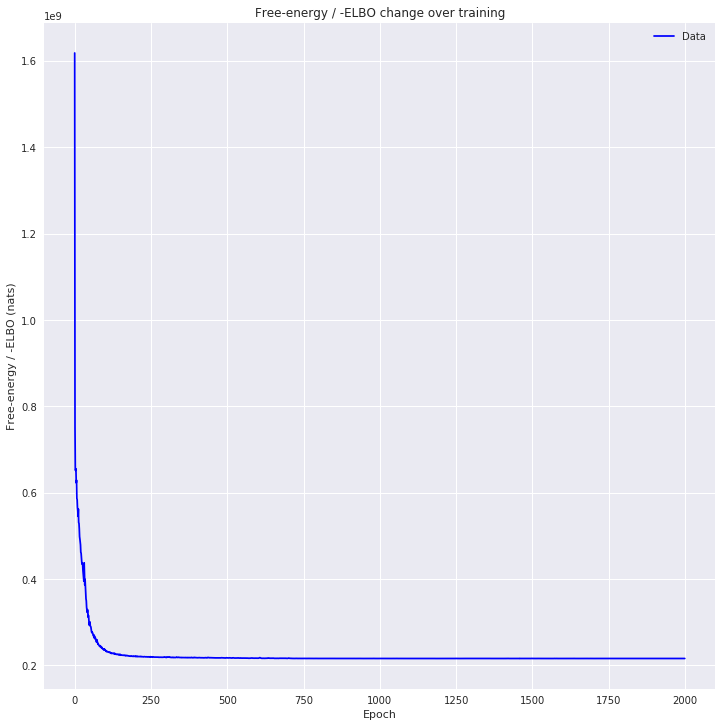

In [9]:
utils.plot_losses(losses)

In [10]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

TypeError: %d format: a number is required, not str

In [ ]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task %s' % block.task

In [ ]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

In [ ]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

In [ ]:
dtfa.visualize_factor_embedding()

In [ ]:
dtfa.plot_subject_template(1)

In [ ]:
dtfa.plot_task_template('2')